In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

from mnk import mnk_alg
from utils import generate_train_set, get_squared_error, get_x
from utils import plot_error_and_convergence, plot_true_weights

In [2]:
def plot_error_and_convergence(errors, weights):
    fig = plt.figure(figsize=(20,20))
    '''
    ax1 = fig.add_subplot(211)
    ax1.plot(errors);
    plt.xlabel('Номер итерации алгоритма Качмажа')
    plt.ylabel('Квадратичная ошибка')
    plt.title('Квадратичная ошибка: (w - w_estimation)^T * (w - w_estimation)')
    '''
    ax2 = fig.add_subplot(212)
    ax2.plot(weights.T)
    plt.title('Как сходятся компоненты вектора w_estimation к w')
    plt.xlabel('Номер итерации')
    plt.ylabel('Численное значение компоненты вектора весов w')

def plot_true_weights(weights, true_weights):
    # Указываем истинные веса на графике: компоненты вектора w 
    for index, w_component in enumerate(np.asarray(true_weights).reshape((-1))):
        plt.axhline(w_component, color='r', linestyle='--', label='{}: {}-ая компонента вектора w'.format(
            w_component, index), alpha=0.5)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
# plot_error_and_convergence(errors, weights)
# plot_true_weights(weights, w)

## МНК

In [3]:
sample_size = 200  # размер выборки
num_of_features = 4 # кол-во признаков - кол-во столбцов в матр. x и размер вектора w

w = np.array([0.1, 0.2, 0.3, 0.4]) # это будет истинным значением памяти модели y = x * w
                                   # x - array of shape (sample_size, num_of_features)
                                   # w - array of shape (num_of_features, 1)
        

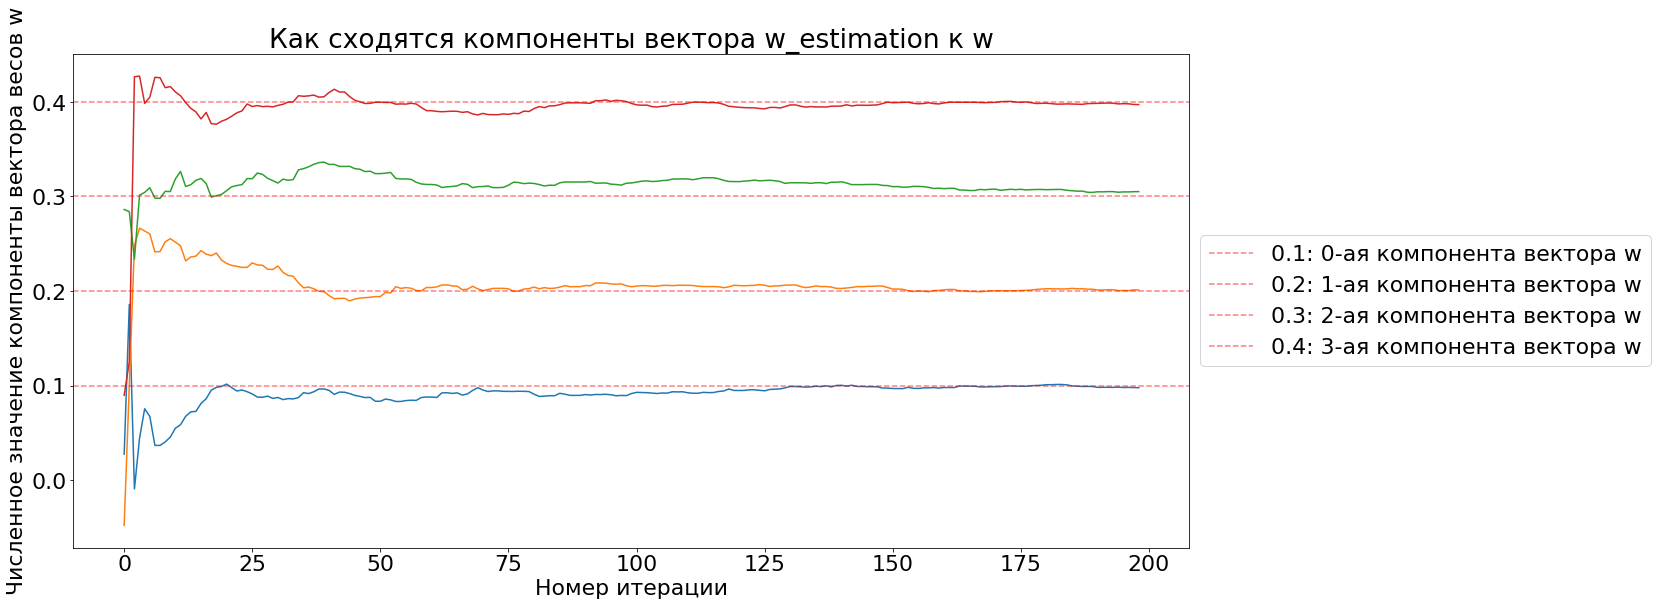

In [7]:
sigma = 2
x, y = generate_train_set(w, sigma, sample_size, num_of_features)  
gen = mnk_alg(x, y)
w_estiomation_prev_step = next(gen)

#print(w_estiomation_prev_step, w)

#squared_error_prev_step = get_squared_error(w_estiomation_prev_step, w)
#errors = squared_error_prev_step
weights = np.array([])

for iteration_num, w_estimation in enumerate(gen):
    #print(iteration_num)
    #squared_error_current_step = get_squared_error(w_estimation, w)
    
    w_estimation = w_estimation.reshape((-1,1))
    #print(w_estimation, w_estimation.shape, weights.shape)
    if weights.size == 0:
        weights = w_estimation
    else:
        weights = np.hstack((weights, w_estimation))
    #errors = np.append(errors, squared_error_current_step)
plot_error_and_convergence(0, weights)
plot_true_weights(weights, w)